# **AI-Powered Real-Time News Effects on Stock Market Changes**

**`Real_time Data Collection, Bert Embedding, Training Evaluation and Deployment `**

In [10]:
import requests
import pandas as pd
from datetime import datetime, timezone, timedelta
from datetime import datetime, timezone, timedelta

import time

# API Key
API_KEY = "KMS8HGH09Y2Y8ZSM"

# Selected 25 tickers
TICKERS = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NVDA', 'NFLX', 'IBM', 'AMD',
    'BA', 'JPM', 'V', 'PG', 'DIS', 'INTC', 'ORCL', 'CSCO', 'PEP', 'KO', 'XOM', 'WMT',
    'T', 'PFE', 'COST'
]

BASE_URL = "https://www.alphavantage.co/query?function=NEWS_SENTIMENT"
all_articles = []


# Set END_DATE to one hour ago from the current moment
END_DATE = datetime.now(timezone.utc) - timedelta(hours=1)  # Current UTC time minus 1 hour
START_DATE = END_DATE - timedelta(days=183)  # Six months prior

def fetch_news(url, ticker="GENERAL", retries=3):
    for attempt in range(retries):
        try:
            response = requests.get(url, timeout=10)
            if response.status_code == 200:
                return response.json()
            else:
                print(f"Warning: Failed to fetch data for {ticker} (status {response.status_code})")
        except requests.RequestException as e:
            print(f"Error for {ticker}: {e}")
        time.sleep(0.5)
    print(f"Failed to fetch data for {ticker} after {retries} attempts")
    return {}

def fetch_daily_news(date, ticker="GENERAL", is_topic=False, max_articles=1000):
    articles_fetched = 0
    limit = 1000  # API limit per request
    time_from = date.replace(hour=0, minute=0, second=0, microsecond=0)
    time_to = date.replace(hour=23, minute=59, second=59, microsecond=999999)
    offset = 0
    url = f"{BASE_URL}&{'topics' if is_topic else 'tickers'}={ticker}&time_from={time_from.strftime('%Y%m%dT%H%M')}&time_to={time_to.strftime('%Y%m%dT%H%M')}&limit={limit}&offset={offset}&apikey={API_KEY}"

    while articles_fetched < max_articles:
        data = fetch_news(url, ticker)
        articles = data.get("feed", [])
        if not articles:
            break
        for article in articles:
            try:
                article_time = datetime.strptime(article["time_published"], "%Y%m%dT%H%M%S").replace(tzinfo=timezone.utc)
                if not (time_from <= article_time <= time_to):
                    continue
                human_time = article_time.strftime("%Y-%m-%d %H:%M:%S %Z")
            except ValueError:
                continue
            all_articles.append({
                "Ticker": ticker,
                "Title": article.get("title", "N/A"),
                "URL": article.get("url", "N/A"),
                "Time Published": article.get("time_published", "N/A"),
                "Article Time": article_time,
                "Timestamp": human_time,
            })
            articles_fetched += 1
            if articles_fetched >= max_articles:
                break
        print(f"Fetched {articles_fetched} articles for {ticker} on {date.date()}")
        time.sleep(0.1)  # Rate limiting
        if len(articles) < limit:
            break
        offset += limit
        url = f"{BASE_URL}&{'topics' if is_topic else 'tickers'}={ticker}&time_from={time_from.strftime('%Y%m%dT%H%M')}&time_to={time_to.strftime('%Y%m%dT%H%M')}&limit={limit}&offset={offset}&apikey={API_KEY}"
    return articles_fetched

def save_to_csv(articles, filename="Daily_News_data_six_months.csv"):
    df = pd.DataFrame(articles)
    if not df.empty:
        df['Date'] = df['Article Time'].dt.date
        daily_data = df.groupby(['Ticker', 'Date']).agg({
            'Title': lambda x: list(x),
            'URL': lambda x: list(x),
            'Timestamp': lambda x: list(x)
        }).reset_index()
        daily_data.columns = ['Ticker', 'Date', 'Titles', 'URLs', 'Timestamps']
    else:
        daily_data = pd.DataFrame(columns=['Ticker', 'Date', 'Titles', 'URLs', 'Timestamps'])
    daily_data.to_csv(filename, index=False)
    print(f"Saved {len(daily_data)} records to {filename}")

current_date = START_DATE
total_articles = 0

try:
    while current_date <= END_DATE:
        print(f"\nProcessing date: {current_date.date()}")
        for ticker in TICKERS:
            total_articles += fetch_daily_news(current_date, ticker, is_topic=False, max_articles=1000)
        topics = ["business", "finance", "technology", "world"]
        for topic in topics:
            total_articles += fetch_daily_news(current_date, topic, is_topic=True, max_articles=1000)
        save_to_csv(all_articles)
        current_date += timedelta(days=1)

except KeyboardInterrupt:
    print("\nInterrupted by user. Saving collected data...")
    save_to_csv(all_articles)
    print(f"Total articles fetched before interruption: {total_articles}")

save_to_csv(all_articles)
print(f"Total articles fetched: {total_articles}")
all_articles_df = pd.DataFrame(all_articles)


Streaming output truncated to the last 5000 lines.
Saved 51 records to Daily_News_data_six_months.csv

Processing date: 2024-10-24
Fetched 18 articles for AAPL on 2024-10-24
Fetched 43 articles for MSFT on 2024-10-24
Fetched 10 articles for AMZN on 2024-10-24
Fetched 41 articles for TSLA on 2024-10-24
Fetched 89 articles for META on 2024-10-24
Fetched 51 articles for NVDA on 2024-10-24
Fetched 15 articles for NFLX on 2024-10-24
Fetched 7 articles for IBM on 2024-10-24
Fetched 4 articles for AMD on 2024-10-24
Fetched 15 articles for BA on 2024-10-24
Fetched 7 articles for V on 2024-10-24
Fetched 3 articles for PG on 2024-10-24
Fetched 4 articles for INTC on 2024-10-24
Fetched 4 articles for CSCO on 2024-10-24
Fetched 4 articles for PEP on 2024-10-24
Fetched 9 articles for KO on 2024-10-24
Fetched 3 articles for XOM on 2024-10-24
Fetched 9 articles for WMT on 2024-10-24
Fetched 8 articles for T on 2024-10-24
Fetched 8 articles for PFE on 2024-10-24
Fetched 6 articles for COST on 2024-10-

In [11]:

all_articles_df.head()

,Ticker,Title,URL,Time Published,Article Time,Timestamp
0,AAPL,NVIDIA Tops $3.5T Milestone - Good Time to Buy...,https://www.zacks.com/stock/news/2355265/nvidi...,20241022T190500,2024-10-22 19:05:00+00:00,2024-10-22 19:05:00 UTC
1,AAPL,"Meta's Smart Glasses Dominate Ray-Ban Stores, ...",https://www.benzinga.com/news/24/10/41458752/m...,20241022T152149,2024-10-22 15:21:49+00:00,2024-10-22 15:21:49 UTC
2,AAPL,Apple iPhone 16 Discounts Roll Out on Alibaba'...,https://www.benzinga.com/government/24/10/4145...,20241022T151250,2024-10-22 15:12:50+00:00,2024-10-22 15:12:50 UTC
3,AAPL,"Market Clubhouse Morning Memo - October 22nd, ...",https://www.benzinga.com/trading-ideas/24/10/4...,20241022T150813,2024-10-22 15:08:13+00:00,2024-10-22 15:08:13 UTC
4,AAPL,Investigating Apple's Standing In Technology H...,https://www.benzinga.com/insights/news/24/10/4...,20241022T150012,2024-10-22 15:00:12+00:00,2024-10-22 15:00:12 UTC


In [ ]:
all_articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359628 entries, 0 to 359627
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Ticker          359628 non-null  object             
 1   Title           359628 non-null  object             
 2   URL             359628 non-null  object             
 3   Time Published  359628 non-null  object             
 4   Article Time    359628 non-null  datetime64[ns, UTC]
 5   Timestamp       359628 non-null  object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 16.5+ MB


In [7]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta, timezone
import time
import logging

# Set up logging
logging.basicConfig(filename="stock_data_log.log", level=logging.INFO,
                    format="%(asctime)s - %(levelname)s - %(message)s")

# Suppress yfinance errors from printing to console
yf_logger = logging.getLogger('yfinance')
yf_logger.setLevel(logging.ERROR)
yf_handler = logging.FileHandler('stock_data_log.log')
yf_handler.setFormatter(logging.Formatter("%(asctime)s - %(levelname)s - %(message)s"))
yf_logger.addHandler(yf_handler)

TICKERS = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NVDA', 'NFLX', 'IBM', 'AMD',
    'BA', 'JPM', 'V', 'PG', 'DIS', 'INTC', 'ORCL', 'CSCO', 'PEP', 'KO', 'XOM', 'WMT',
    'T', 'PFE', 'COST'
]

def get_intraday_stock_data(tickers, start_date, end_date, period_name, interval="5m"):
    stock_data = []
    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            hist = stock.history(start=start_date, end=end_date, interval=interval)
            if not hist.empty:
                for timestamp, row in hist.iterrows():
                    stock_data.append({
                        "Ticker": ticker,
                        "Timestamp": timestamp,
                        "Open": row["Open"],
                        "High": row["High"],
                        "Low": row["Low"],
                        "Close": row["Close"],
                        "Volume": row["Volume"],
                        "Period": period_name
                    })
                logging.info(f"Fetched {len(hist)} 5-min records for {ticker} in {period_name} "
                             f"({start_date.date()} to {end_date.date()})")
        except Exception as e:
            logging.error(f"Error fetching data for {ticker} in {period_name}: {str(e)}")
        time.sleep(1)  # Rate limiting
    df = pd.DataFrame(stock_data)
    if not df.empty:
        df["Timestamp"] = pd.to_datetime(df["Timestamp"]).dt.floor("min")
        df = df.sort_values(by=["Timestamp", "Ticker"])
    return df

# Define time range
END_DATE = datetime.now(timezone.utc) - timedelta(hours=1)  # One hour ago
START_DATE = END_DATE - timedelta(days=183)  # ~October 19, 2024

# Split into three phases (~61 days each)
total_days = (END_DATE - START_DATE).days
phase_days = total_days // 3  # ~61 days

# Phase 1: ~October 19, 2024, to ~December 19, 2024
phase1_start = START_DATE
phase1_end = phase1_start + timedelta(days=phase_days)

# Phase 2: ~December 20, 2024, to ~February 18, 2025
phase2_start = phase1_end + timedelta(minutes=1)
phase2_end = phase2_start + timedelta(days=phase_days)

# Phase 3: ~February 19, 2025, to ~April 23, 2025 (one hour ago)
phase3_start = phase2_end + timedelta(minutes=1)
phase3_end = END_DATE

# Function to split a phase into smaller periods (max 60 days)
def fetch_phase_data(tickers, start_date, end_date, phase_name, interval="60m"):
    dfs = []
    current_start = start_date
    while current_start < end_date:
        current_end = min(current_start + timedelta(days=60), end_date)
        # Skip periods shorter than 1 day to avoid non-trading day errors
        if (current_end - current_start).days < 1:
            current_start = current_end + timedelta(minutes=1)
            continue
        df = get_intraday_stock_data(tickers, current_start, current_end, phase_name, interval)
        if not df.empty:
            dfs.append(df)
        current_start = current_end + timedelta(minutes=1)
        time.sleep(2)  # Delay between sub-periods
    return pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

# Fetch data for each phase
df_phase1 = fetch_phase_data(TICKERS, phase1_start, phase1_end, "Phase 1")
logging.info(f"Phase 1 data: {len(df_phase1)} records")

df_phase2 = fetch_phase_data(TICKERS, phase2_start, phase2_end, "Phase 2")
logging.info(f"Phase 2 data: {len(df_phase2)} records")

df_phase3 = fetch_phase_data(TICKERS, phase3_start, phase3_end, "Phase 3")
logging.info(f"Phase 3 data: {len(df_phase3)} records")

# Combine all phases
df_stock = pd.concat([df_phase1, df_phase2, df_phase3], ignore_index=True)
if not df_stock.empty:
    df_stock = df_stock.sort_values(by=["Timestamp", "Ticker"])
    df_stock.to_csv("stock_data_5min.csv", index=False)
    print(f"\nCombined stock data saved to stock_data.csv with {len(df_stock)} records")
else:
    print("\nNo data collected. Check logs for details.")
    logging.error("No data collected for any phase.")


Combined stock data saved to stock_data.csv with 21150 records


In [8]:
# Display the first 5 rows of the combined DataFrame
print("\nPreview of combined stock data:")
df_stock.head()


Preview of combined stock data:


,Ticker,Timestamp,Open,High,Low,Close,Volume,Period
0,AAPL,2024-10-22 12:30:00-04:00,234.190002,235.039993,234.149994,234.850006,0.0,Phase 1
1,AMD,2024-10-22 12:30:00-04:00,152.110001,153.403900,152.070007,153.240097,0.0,Phase 1
2,AMZN,2024-10-22 12:30:00-04:00,189.369995,190.149994,189.309998,189.750000,0.0,Phase 1
3,BA,2024-10-22 12:30:00-04:00,159.750107,160.250000,159.640106,159.860001,0.0,Phase 1
4,COST,2024-10-22 12:30:00-04:00,887.070007,889.710022,887.010010,889.044983,0.0,Phase 1


In [9]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21150 entries, 0 to 21149
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype                           
---  ------     --------------  -----                           
 0   Ticker     21150 non-null  object                          
 1   Timestamp  21150 non-null  datetime64[ns, America/New_York]
 2   Open       21150 non-null  float64                         
 3   High       21150 non-null  float64                         
 4   Low        21150 non-null  float64                         
 5   Close      21150 non-null  float64                         
 6   Volume     21150 non-null  float64                         
 7   Period     21150 non-null  object                          
dtypes: datetime64[ns, America/New_York](1), float64(5), object(2)
memory usage: 1.3+ MB


In [ ]:
import pandas as pd

# Convert Timestamp columns to datetime with UTC
all_articles_df['Timestamp'] = pd.to_datetime(all_articles_df['Timestamp'], utc=True)
df_stock['Timestamp'] = pd.to_datetime(df_stock['Timestamp'], utc=True)

#  Sort both DataFrames by Timestamp (required for merge_asof)
all_articles_df = all_articles_df.sort_values('Timestamp')
df_stock = df_stock.sort_values('Timestamp')

# Step 3: Merge using merge_asof on Timestamp with 60-minute tolerance
merged_data = pd.merge_asof(
    all_articles_df,
    df_stock,
    on='Timestamp',
    direction='nearest',
    tolerance=pd.Timedelta('60min')
)

# Rename and clean up Ticker columns
merged_data = merged_data.rename(columns={'Ticker_x': 'Ticker'})
merged_data = merged_data.drop(columns=['Ticker_y'], errors='ignore')  # In case it's not present

# Drop rows where no stock data was matched
merged_data = merged_data.dropna(subset=['Open', 'High', 'Low', 'Close', 'Volume'])

#  Select and reorder columns
merged_data = merged_data[['Ticker', 'Title', 'URL', 'Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Display DataFrame info
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1379 entries, 513 to 227201
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Ticker     1379 non-null   object             
 1   Title      1379 non-null   object             
 2   URL        1379 non-null   object             
 3   Timestamp  1379 non-null   datetime64[ns, UTC]
 4   Open       1379 non-null   float64            
 5   High       1379 non-null   float64            
 6   Low        1379 non-null   float64            
 7   Close      1379 non-null   float64            
 8   Volume     1379 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(3)
memory usage: 107.7+ KB


In [ ]:
merged_data.head()

,Ticker,Title,URL,Timestamp,Open,High,Low,Close,Volume
513,technology,"SPIR DEADLINE: RLF, A TOP-RANKED LAW FIRM, Enc...",https://www.benzinga.com/pressreleases/24/10/g...,2024-10-21 03:03:00+00:00,222.691137,223.165743,220.39718,220.496063,5870000.0
514,META,"SPIR DEADLINE: RLF, A TOP-RANKED LAW FIRM, Enc...",https://www.benzinga.com/pressreleases/24/10/g...,2024-10-21 03:03:00+00:00,222.691137,223.165743,220.39718,220.496063,5870000.0
515,technology,"OpenAI's Chinese Cousins Alibaba, And ByteDanc...",https://www.benzinga.com/news/24/10/41420451/o...,2024-10-21 03:39:27+00:00,222.691137,223.165743,220.39718,220.496063,5870000.0
516,NVDA,"OpenAI's Chinese Cousins Alibaba, And ByteDanc...",https://www.benzinga.com/news/24/10/41420451/o...,2024-10-21 03:39:27+00:00,222.691137,223.165743,220.39718,220.496063,5870000.0
517,finance,Exclusive | Hong Kong's 2024 bankers' summit a...,https://www.scmp.com/business/banking-finance/...,2024-10-21 03:40:59+00:00,222.691137,223.165743,220.39718,220.496063,5870000.0


In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch
import spacy
import re
import nltk
from nltk.corpus import stopwords
import numpy as np

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize spaCy and stopwords
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))

# Clean text function
def clean_text(text):
    if not isinstance(text, str):
        return "no news available"
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    doc = nlp(text)
    words = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct]
    cleaned = " ".join(words)
    return cleaned if cleaned else "no news available"

# Apply cleaning to Title column
merged_data['cleaned_title'] = merged_data['Title'].apply(clean_text)

# Initialize BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Get BERT embedding
def get_bert_embedding(text):
    tokens = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        output = bert_model(**tokens)
    return output.last_hidden_state.mean(dim=1).squeeze().numpy()

# Apply BERT embeddings
merged_data['bert_embedding'] = merged_data['cleaned_title'].apply(get_bert_embedding)

# Save to pickle
merged_data.to_pickle("merged_data_with_embeddings.pkl")
print("Merged data with BERT embeddings sample:")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Merged data with BERT embeddings sample:


In [ ]:
from IPython.display import display

# Display sample of the merged DataFrame
print("Merged data with BERT embeddings sample:")
display(merged_data[['Ticker', 'Timestamp', 'Title', 'cleaned_title']].head())


Merged data with BERT embeddings sample:


,Ticker,Timestamp,Title,cleaned_title
513,technology,2024-10-21 03:03:00+00:00,"SPIR DEADLINE: RLF, A TOP-RANKED LAW FIRM, Enc...",spir deadline rlf topranked law firm encourage...
514,META,2024-10-21 03:03:00+00:00,"SPIR DEADLINE: RLF, A TOP-RANKED LAW FIRM, Enc...",spir deadline rlf topranked law firm encourage...
515,technology,2024-10-21 03:39:27+00:00,"OpenAI's Chinese Cousins Alibaba, And ByteDanc...",openais chinese cousin alibaba bytedance slash...
516,NVDA,2024-10-21 03:39:27+00:00,"OpenAI's Chinese Cousins Alibaba, And ByteDanc...",openais chinese cousin alibaba bytedance slash...
517,finance,2024-10-21 03:40:59+00:00,Exclusive | Hong Kong's 2024 bankers' summit a...,exclusive hong kong banker summit sell a...


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Prepare data (no scaling, no sequences)
stock_features = merged_data[['Open', 'High', 'Low']].values
bert_embeddings = np.stack(merged_data['bert_embedding'].values)
X = np.concatenate([stock_features, bert_embeddings], axis=1)
y = merged_data['Close'].values

# Split data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Add sequence dimension for LSTM
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=32)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32)

# Model definition
class NewsAndStockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(NewsAndStockLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc1 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc2 = nn.Linear(hidden_size // 2, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]  # Take the last time step
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = stock_features.shape[1] + bert_embeddings.shape[1]  # 3 + 768
model = NewsAndStockLSTM(input_size=input_size, hidden_size=256, num_layers=2, output_size=1).to(device)
print("News and Stock LSTM Model:")
print(model)

# Training setup
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=50)
epochs = 1000

train_losses = []
val_losses = []
train_r2_scores = []
val_r2_scores = []

print("Training News and Stock LSTM Model...")
for epoch in range(epochs):
    model.train()
    train_loss = 0
    train_predictions = []
    train_actuals = []
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_predictions.extend(predictions.detach().cpu().numpy().flatten())
        train_actuals.extend(batch_y.detach().cpu().numpy().flatten())
    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_r2 = r2_score(train_actuals, train_predictions)
    train_r2_scores.append(train_r2)

    model.eval()
    val_loss = 0
    val_predictions = []
    val_actuals = []
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            predictions = model(batch_X)
            loss = criterion(predictions, batch_y)
            val_loss += loss.item()
            val_predictions.extend(predictions.detach().cpu().numpy().flatten())
            val_actuals.extend(batch_y.detach().cpu().numpy().flatten())
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    val_r2 = r2_score(val_actuals, val_predictions)
    val_r2_scores.append(val_r2)
    scheduler.step(avg_val_loss)

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.6f}, Val Loss: {avg_val_loss:.6f}, "
              f"Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}")

    # Save model at each epoch
    torch.save(model.state_dict(), "news_and_stock_lstm_model.pth")

print("Training completed!")



News and Stock LSTM Model:
NewsAndStockLSTM(
  (lstm): LSTM(771, 256, num_layers=2, batch_first=True, dropout=0.2)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)
Training News and Stock LSTM Model...
Epoch 20/1000, Train Loss: 84679.307242, Val Loss: 54365.243924, Train R²: -0.3498, Val R²: -0.3365
Epoch 40/1000, Train Loss: 51249.292480, Val Loss: 29551.981066, Train R²: 0.1859, Val R²: 0.2845
Epoch 60/1000, Train Loss: 29279.850163, Val Loss: 16049.091043, Train R²: 0.5364, Val R²: 0.6145
Epoch 80/1000, Train Loss: 14703.978922, Val Loss: 7965.347949, Train R²: 0.7655, Val R²: 0.8087
Epoch 100/1000, Train Loss: 6272.890686, Val Loss: 3227.312819, Train R²: 0.9005, Val R²: 0.9228
Epoch 120/1000, Train Loss: 2524.539774, Val Loss: 1080.609908, Train R²: 0.9598, Val R²: 0.9743
Epoch 140/1000, Train Loss: 1482.594539, Val Loss: 473.183155, Train R²: 0.9

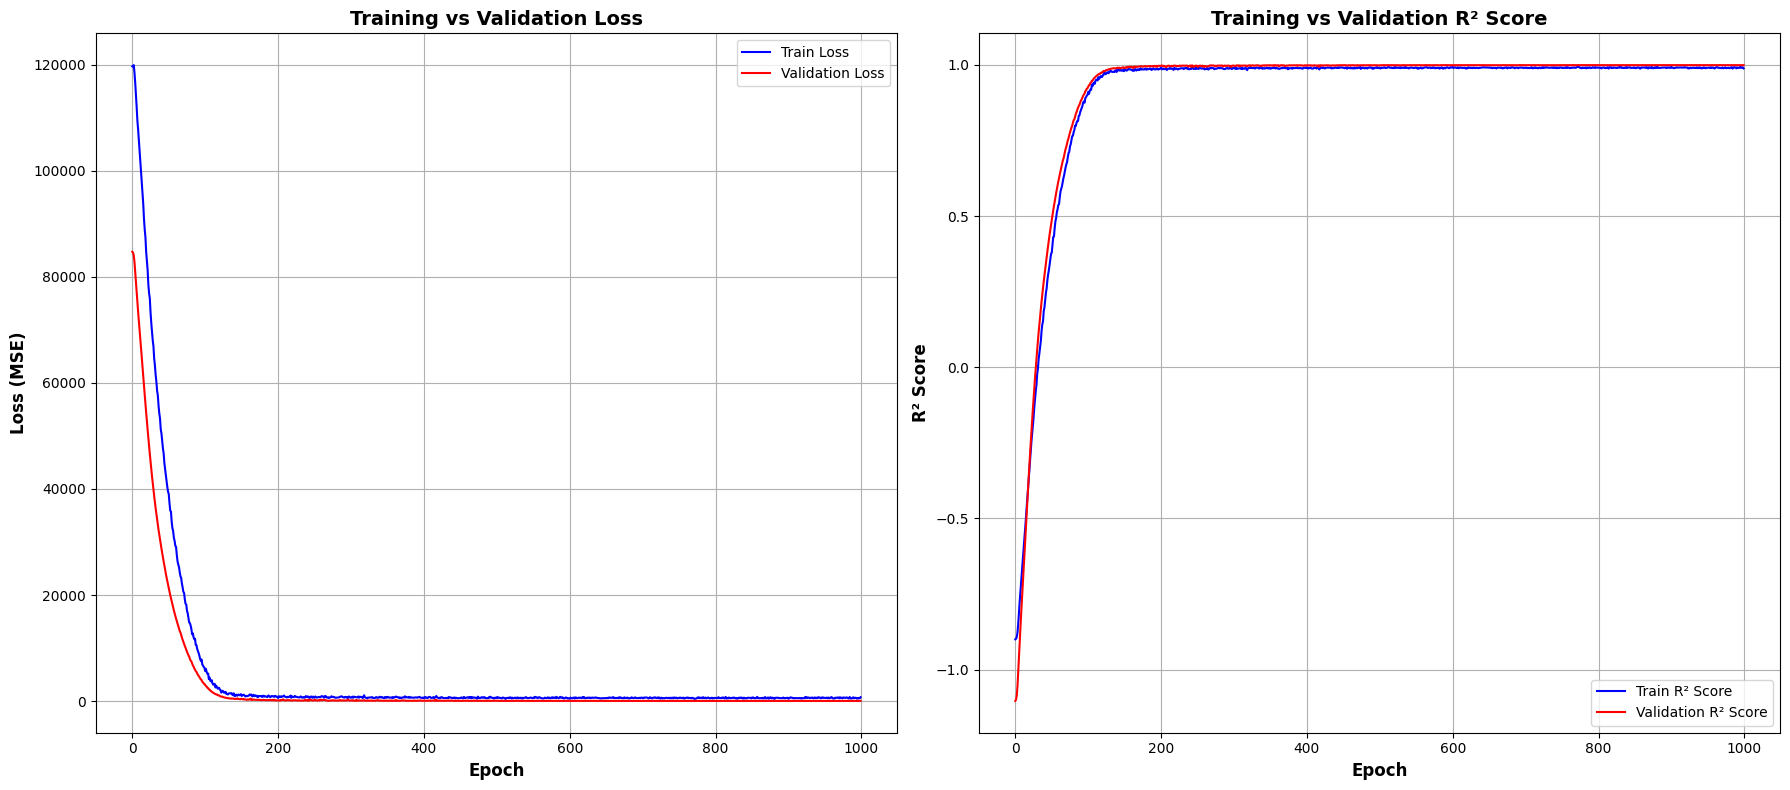

In [ ]:

import matplotlib.pyplot as plt

# Create one figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# --- Loss Plot ---
axs[0].plot(train_losses, label='Train Loss', color='blue')
axs[0].plot(val_losses, label='Validation Loss', color='red')
axs[0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axs[0].set_ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
axs[0].set_title('Training vs Validation Loss', fontsize=14, fontweight='bold')
axs[0].legend()
axs[0].grid(True)

# --- R² Score Plot ---
axs[1].plot(train_r2_scores, label='Train R² Score', color='blue')
axs[1].plot(val_r2_scores, label='Validation R² Score', color='red')
axs[1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axs[1].set_ylabel('R² Score', fontsize=12, fontweight='bold')
axs[1].set_title('Training vs Validation R² Score', fontsize=14, fontweight='bold')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.savefig('loss_r2_combined.png')
plt.show()



In [ ]:
# Evaluate on test set
model.load_state_dict(torch.load("news_and_stock_lstm_model.pth"))
model.eval()

test_loss = 0
predictions_list = []
actuals_list = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)
        test_loss += loss.item()
        predictions_list.extend(predictions.cpu().numpy().flatten())
        actuals_list.extend(batch_y.cpu().numpy().flatten())

# No unscaling needed since data was not scaled
predictions = np.array(predictions_list)
actuals = np.array(actuals_list)

rmse = np.sqrt(mean_squared_error(actuals, predictions))
r2 = r2_score(actuals, predictions)

print("\nTest Set Performance:")
print(f"Test Loss (MSE): {test_loss / len(test_loader):.6f}")
print(f"Test RMSE: {rmse:.6f}")
print(f"R² Score: {r2:.4f}")




Test Set Performance:
Test Loss (MSE): 99.436538
Test RMSE: 10.141343
R² Score: 0.9984


In [ ]:
# Show predictions vs actuals
results_df = pd.DataFrame({
    'Actual Close Price': actuals,
    'Predicted Close Price': predictions
})
print("\nSample Predictions vs Actual Close Prices:")
try:
    display(results_df.head(10).round(2))
except NameError:
    print(results_df.head(10).round(2))




Sample Predictions vs Actual Close Prices:


,Actual Close Price,Predicted Close Price
0,242.380005,238.789993
1,61.799999,62.049999
2,442.679993,442.529999
3,182.630005,180.250000
4,111.349998,111.099998
5,938.640015,934.039978
6,169.210007,167.710007
7,25.600000,25.660000
8,416.119995,415.529999
9,169.210007,168.360001


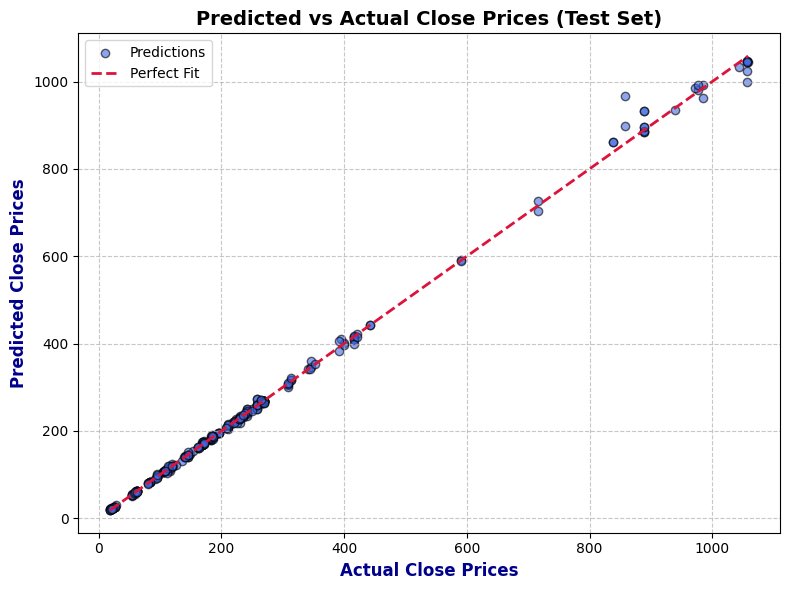

In [ ]:
import matplotlib.pyplot as plt

# Plot predictions vs actuals
plt.figure(figsize=(8, 6))
plt.scatter(actuals, predictions, color='royalblue', alpha=0.6, edgecolor='black', label='Predictions')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)],
         color='crimson', linestyle='--', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual Close Prices', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Predicted Close Prices', fontsize=12, fontweight='bold', color='darkblue')
plt.title('Predicted vs Actual Close Prices (Test Set)', fontsize=14, fontweight='bold', color='black')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('predictions_plot.png')
plt.show()


# **Gradio Implementation**

In [ ]:
!pip install gradio
!pip install schedule

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.9 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import torch
import torch.nn as nn
import numpy as np
from transformers import BertTokenizer, BertModel
import spacy
import re
from nltk.corpus import stopwords
import requests
import pandas as pd
from datetime import datetime, timezone, timedelta
import yfinance as yf
import matplotlib.pyplot as plt
import os
import tempfile
import logging
import time

# Set up logging
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

# Load spaCy and stopwords
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))

# Alpha Vantage API Key
API_KEY = "KMS8HGH09Y2Y8ZSM"
BASE_URL = "https://www.alphavantage.co/query?function=NEWS_SENTIMENT"

# Define LSTM model
class NewsAndStockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(NewsAndStockLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc1 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc2 = nn.Linear(hidden_size // 2, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

# Initialize model and BERT
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
try:
    model = NewsAndStockLSTM(input_size=771, hidden_size=256, num_layers=2, output_size=1).to(device)
    model.load_state_dict(torch.load("news_and_stock_lstm_model.pth"))
    model.eval()
    logging.info("Model loaded successfully")
except Exception as e:
    logging.error(f"Error loading model: {str(e)}")
    raise

try:
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)
    logging.info("BERT model loaded successfully")
except Exception as e:
    logging.error(f"Error loading BERT model: {str(e)}")
    raise

# Global variables
prediction_history = []
UPDATE_INTERVAL = 60  # 1 minutes to avoid API rate limits; set to 60 with premium API key
last_stock_data = {}  # Cache for last successful stock data per ticker: {ticker: [open, high, low]}

# Utility functions
def clean_text(text):
    if not isinstance(text, str):
        return "no news available"
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    doc = nlp(text)
    words = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct]
    cleaned = " ".join(words)
    return cleaned if cleaned else "no news available"

def get_bert_embedding(text):
    try:
        tokens = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
        with torch.no_grad():
            output = bert_model(**tokens)
        return output.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    except Exception as e:
        logging.error(f"Error generating BERT embedding: {str(e)}")
        return np.zeros(768)

def fetch_eighteen_hour_news(ticker):
    logging.debug(f"Fetching news for ticker: {ticker}")
    try:
        current_time = datetime.now(timezone.utc)
        time_to = current_time
        time_from = time_to - timedelta(hours=18)
        url = f"{BASE_URL}&tickers={ticker}&time_from={time_from.strftime('%Y%m%dT%H%M')}&time_to={time_to.strftime('%Y%m%dT%H%M')}&limit=50&apikey={API_KEY}"
        for attempt in range(3):
            response = requests.get(url, timeout=10)
            if response.status_code == 429:
                logging.warning(f"Rate limit hit, retrying in {2 ** attempt}s")
                time.sleep(2 ** attempt)
                continue
            if response.status_code != 200:
                logging.error(f"News API request failed with status {response.status_code}")
                return None, f"Error: Failed to fetch news (status {response.status_code})"
            data = response.json()
            articles = data.get("feed", [])
            news_items = []
            for article in articles:
                try:
                    article_time = datetime.strptime(article["time_published"], "%Y%m%dT%H%M%S").replace(tzinfo=timezone.utc)
                    if time_from <= article_time <= time_to:
                        news_items.append({
                            "Title": article.get("title", "N/A"),
                            "Timestamp": article_time.strftime("%Y-%m-%d %H:%M:%S %Z"),
                            "Link": article.get("url", "N/A")
                        })
                except ValueError:
                    continue
            news_items = sorted(news_items, key=lambda x: x["Timestamp"], reverse=True)[:6]
            logging.debug(f"Fetched {len(news_items)} news items")
            return news_items, None
        return None, "Error: API rate limit exceeded"
    except Exception as e:
        logging.error(f"Error fetching news: {str(e)}")
        return None, f"Error fetching news: {str(e)}"

def fetch_stock_data(ticker):
    global last_stock_data
    logging.debug(f"Fetching real-time stock data for ticker: {ticker}")
    try:
        # Attempt real-time fetch with yfinance
        stock = yf.Ticker(ticker)
        for attempt in range(3):
            try:
                # Fetch 1-minute intraday data for today
                hist = stock.history(period="1d", interval="1m")
                if not hist.empty:
                    latest = hist.iloc[-1]  # Most recent minute
                    stock_data = np.array([float(latest['Open']), float(latest['High']), float(latest['Low'])], dtype=np.float64)
                    timestamp = latest.name.strftime("%Y-%m-%d %H:%M:%S %Z")
                    logging.debug(f"Real-time stock data from yfinance: {stock_data} at {timestamp}")
                    last_stock_data[ticker] = stock_data  # Update cache
                    return stock_data, None
                logging.warning("No real-time data available, retrying")
                time.sleep(2 ** attempt)
            except Exception as e:
                logging.warning(f"yfinance attempt {attempt + 1} failed: {str(e)}")
                time.sleep(2 ** attempt)
        logging.warning("Real-time data fetch failed, falling back to CSV")

        # Fallback to CSV
        try:
            df_stock = pd.read_csv("stock_data_daily.csv")
            df_stock['Timestamp'] = pd.to_datetime(df_stock['Timestamp'], utc=True)
            ticker_data = df_stock[df_stock['Ticker'] == ticker].sort_values('Timestamp', ascending=False)
            if not ticker_data.empty:
                latest = ticker_data.iloc[0]
                stock_data = np.array([float(latest['Open']), float(latest['High']), float(latest['Low'])], dtype=np.float64)
                logging.debug(f"Stock data from CSV: {stock_data}")
                last_stock_data[ticker] = stock_data  # Update cache
                return stock_data, None
            logging.warning("No stock data available in CSV, using last cached data")
            if ticker in last_stock_data:
                logging.debug(f"Using cached stock data: {last_stock_data[ticker]}")
                return last_stock_data[ticker], "Warning: Using last cached stock data"
            logging.error("No stock data available")
            return None, "Error: No stock data available"
        except Exception as e:
            logging.error(f"Error reading CSV: {str(e)}")
            if ticker in last_stock_data:
                logging.debug(f"Using cached stock data: {last_stock_data[ticker]}")
                return last_stock_data[ticker], f"Warning: Using last cached stock data (CSV error: {str(e)})"
            return None, f"Error: No stock data available (CSV error: {str(e)})"
    except Exception as e:
        logging.error(f"Error fetching stock data: {str(e)}")
        if ticker in last_stock_data:
            logging.debug(f"Using cached stock data: {last_stock_data[ticker]}")
            return last_stock_data[ticker], f"Warning: Using last cached stock data (fetch error: {str(e)})"
        return None, f"Error: No stock data available (fetch error: {str(e)})"

def generate_prediction_plot():
    if not prediction_history:
        logging.debug("No prediction history for plot")
        return None
    timestamps, prices = zip(*prediction_history)
    timestamps = [datetime.strptime(ts, "%Y-%m-%d %H:%M:%S %Z") for ts in timestamps]
    plt.figure(figsize=(10, 6))
    plt.plot(timestamps, prices, marker='o', color='blue', label='Predicted Close Price')
    plt.xlabel('Timestamp')
    plt.ylabel('Predicted Close Price ($)')
    plt.title('Stock Price Prediction History')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.ylim(min(prices) * 0.95, max(prices) * 1.05)
    plt.tight_layout()
    try:
        with tempfile.NamedTemporaryFile(delete=False, suffix='.png') as tmp_file:
            plt.savefig(tmp_file.name, format='png')
            tmp_file_path = tmp_file.name
        plt.close()
        logging.debug(f"Prediction plot saved to {tmp_file_path}")
        return tmp_file_path
    except Exception as e:
        logging.error(f"Error saving plot: {str(e)}")
        plt.close()
        return None

def refresh_manual_prices(ticker):
    """Fetch latest stock data and return values for Open, High, Low inputs."""
    try:
        stock_data, message = fetch_stock_data(ticker)
        if stock_data is not None:
            return float(stock_data[0]), float(stock_data[1]), float(stock_data[2]), message
        return 244.15, 245.18, 241.84, message or "Error: No stock data available"
    except Exception as e:
        logging.error(f"Error in refresh_manual_prices: {str(e)}")
        return 244.15, 245.18, 241.84, f"Error: Failed to refresh prices ({str(e)})"

def automated_prediction(ticker, automation_state):
    global prediction_history
    logging.debug(f"Running automated prediction for ticker: {ticker}")
    if not ticker:
        return pd.DataFrame({"Title": [], "Timestamp": [], "Link": []}), pd.DataFrame(), None

    news_items, news_error = fetch_eighteen_hour_news(ticker)
    if news_error:
        return pd.DataFrame({"Title": [], "Timestamp": [], "Link": []}), pd.DataFrame(), None
    if not news_items:
        news_items = [{"Title": "No news available", "Timestamp": "N/A", "Link": "N/A"}]
    news_df = pd.DataFrame(news_items)
    if news_df.empty:
        news_df = pd.DataFrame({"Title": ["No news available"], "Timestamp": ["N/A"], "Link": ["N/A"]})

    stock_data, stock_message = fetch_stock_data(ticker)
    if stock_data is None:
        return news_df, pd.DataFrame(), None
    stock_data = np.array([stock_data], dtype=np.float64)

    bert_embedding = get_bert_embedding(clean_text(news_items[0]["Title"]))
    input_data = np.concatenate([stock_data, bert_embedding.reshape(1, -1)], axis=1)
    input_tensor = torch.tensor(input_data, dtype=torch.float32).unsqueeze(1).to(device)

    try:
        with torch.no_grad():
            pred = model(input_tensor).cpu().numpy()[0][0]
        logging.debug(f"Prediction: {pred}")
    except Exception as e:
        logging.error(f"Error making prediction: {str(e)}")
        return news_df, pd.DataFrame(), None

    prediction_time = datetime.now(timezone.utc).strftime("%Y-%m-%d %H:%M:%S %Z")
    prediction_history.append((prediction_time, pred))
    prediction_history = prediction_history[-50:]

    if "pred_history" not in automation_state:
        automation_state["pred_history"] = []
    automation_state["pred_history"].append({
        "Ticker": ticker,
        "Open": stock_data[0][0],
        "High": stock_data[0][1],
        "Low": stock_data[0][2],
        "Predicted Close": pred,
        "Timestamp": prediction_time,
        "Message": stock_message if stock_message and stock_message.startswith("Warning") else None
    })
    automation_state["pred_history"] = automation_state["pred_history"][-50:]
    pred_df = pd.DataFrame(automation_state["pred_history"])
    pred_df["Open"] = pred_df["Open"].map("{:.2f}".format)
    pred_df["High"] = pred_df["High"].map("{:.2f}".format)
    pred_df["Low"] = pred_df["Low"].map("{:.2f}".format)
    pred_df["Predicted Close"] = pred_df["Predicted Close"].map("${:.2f}".format)
    logging.debug(f"Updated pred_history: {len(automation_state['pred_history'])} entries")

    if "news_history" not in automation_state:
        automation_state["news_history"] = pd.DataFrame({"Title": [], "Timestamp": [], "Link": []})
    if not news_df.empty:
        automation_state["news_history"] = pd.concat([automation_state["news_history"], news_df], ignore_index=True)
        automation_state["news_history"] = automation_state["news_history"].drop_duplicates(subset=["Link"]).sort_values("Timestamp", ascending=False)
        automation_state["news_history"] = automation_state["news_history"].iloc[:50]
    logging.debug(f"Updated news_history: {len(automation_state['news_history'])} articles")

    plot = generate_prediction_plot()
    return news_df, pred_df, plot

def countdown(ticker, automation_state):
    default_news_df = pd.DataFrame({"Title": [], "Timestamp": [], "Link": []})
    default_pred_df = pd.DataFrame(columns=["Ticker", "Open", "High", "Low", "Predicted Close", "Timestamp", "Message"])
    default_plot = None
    while automation_state.get("running", False):
        seconds = UPDATE_INTERVAL
        while seconds >= 0 and automation_state.get("running", False) and not automation_state.get("paused", False):
            mins, secs = divmod(seconds, 60)
            timer = f'{mins:02}:{secs:02}'
            logging.debug(f"Countdown: {timer}")
            if seconds == 0:
                try:
                    news_df, pred_df, plot = automated_prediction(ticker, automation_state)
                    if automation_state.get("plot") and os.path.exists(automation_state.get("plot")):
                        os.remove(automation_state["plot"])
                    automation_state["news_df"] = news_df
                    automation_state["pred_df"] = pred_df
                    automation_state["plot"] = plot
                    yield f"Countdown: {timer}", automation_state["news_history"], pred_df, plot
                except Exception as e:
                    logging.error(f"Error in countdown prediction: {str(e)}")
                    automation_state["running"] = False
                    yield f"Error: {str(e)}", default_news_df, default_pred_df, None
            else:
                yield (f"Countdown: {timer}", automation_state.get("news_history", default_news_df), automation_state.get("pred_df", default_pred_df), automation_state.get("plot", default_plot))
            time.sleep(1)
            seconds -= 1
        while automation_state.get("paused", False) and automation_state.get("running", False):
            yield (f"Paused: {timer}", automation_state.get("news_history", default_news_df), automation_state.get("pred_df", default_pred_df), automation_state.get("plot", default_plot))
            time.sleep(1)
    yield "Countdown: N/A", default_news_df, default_pred_df, None

def start_automation(ticker, automation_state):
    logging.debug(f"Start automation requested for ticker: {ticker}")
    if not ticker:
        return automation_state, pd.DataFrame({"Title": [], "Timestamp": [], "Link": []}), pd.DataFrame(), None, "Countdown: N/A"
    if automation_state.get("running", False):
        return automation_state, automation_state.get("news_history", pd.DataFrame({"Title": [], "Timestamp": [], "Link": []})), automation_state.get("pred_df", pd.DataFrame()), automation_state.get("plot", None), "Countdown: N/A"

    try:
        news_df, pred_df, plot = automated_prediction(ticker, automation_state)
        automation_state["running"] = True
        automation_state["paused"] = False
        automation_state["ticker"] = ticker
        automation_state["news_df"] = news_df
        automation_state["pred_df"] = pred_df
        automation_state["plot"] = plot
        automation_state["countdown"] = f"Countdown: {UPDATE_INTERVAL // 60:02}:00"
        logging.info("Automation started successfully")
        return automation_state, automation_state["news_history"], pred_df, plot, automation_state["countdown"]
    except Exception as e:
        logging.error(f"Error starting automation: {str(e)}")
        return automation_state, pd.DataFrame({"Title": [], "Timestamp": [], "Link": []}), pd.DataFrame(), None, "Error starting automation"

def pause_automation(automation_state):
    logging.debug("Pause automation requested")
    if not automation_state.get("running", False):
        return automation_state, automation_state.get("news_history", pd.DataFrame({"Title": [], "Timestamp": [], "Link": []})), automation_state.get("pred_df", pd.DataFrame()), automation_state.get("plot", None), "Countdown: N/A"
    automation_state["paused"] = not automation_state.get("paused", False)
    status = "Paused" if automation_state["paused"] else "Resumed"
    logging.info(f"Automation {status}")
    return automation_state, automation_state["news_history"], automation_state["pred_df"], automation_state["plot"], f"{status}: {automation_state.get('countdown', 'N/A')}"

def stop_automation(automation_state):
    logging.debug("Stop automation requested")
    if automation_state.get("plot") and os.path.exists(automation_state.get("plot")):
        os.remove(automation_state["plot"])
    automation_state["running"] = False
    automation_state["paused"] = False
    automation_state["ticker"] = ""
    automation_state["news_df"] = pd.DataFrame({"Title": [], "Timestamp": [], "Link": []})
    automation_state["pred_df"] = pd.DataFrame(columns=["Ticker", "Open", "High", "Low", "Predicted Close", "Timestamp", "Message"])
    automation_state["plot"] = None
    automation_state["countdown"] = "Countdown: N/A"
    automation_state["pred_history"] = []
    automation_state["news_history"] = pd.DataFrame({"Title": [], "Timestamp": [], "Link": []})
    logging.info("Automation stopped")
    return automation_state, automation_state["news_history"], automation_state["pred_df"], automation_state["plot"], automation_state["countdown"]

def manual_prediction(ticker, open_price, high_price, low_price, news_title):
    try:
        if not ticker or not news_title:
            return "Error: Please provide a ticker symbol and news headline."
        if open_price <= 0 or high_price <= 0 or low_price <= 0:
            return "Error: Stock prices must be positive."
        stock_data = np.array([[open_price, high_price, low_price]], dtype=np.float64)
        cleaned_title = clean_text(news_title)
        bert_embedding = get_bert_embedding(cleaned_title)
        input_data = np.concatenate([stock_data, bert_embedding.reshape(1, -1)], axis=1)
        input_tensor = torch.tensor(input_data, dtype=torch.float32).unsqueeze(1).to(device)
        with torch.no_grad():
            pred = model(input_tensor).cpu().numpy()[0][0]
        prediction_time = datetime.now(timezone.utc).strftime("%Y-%m-%d %H:%M:%S %Z")
        return (f"Manual Prediction for {ticker}:\n"
                f"- Predicted Close Price @ {prediction_time}: ${pred:.2f}")
    except Exception as e:
        logging.error(f"Error in manual prediction: {str(e)}")
        return f"Error: {str(e)}"

def create_interface():
    css = """
    #start-btn {background-color: #28a745 !important; color: white !important;}
    #pause-btn {background-color: #007bff !important; color: white !important;}
    #stop-btn {background-color: #dc3545 !important; color: white !important;}
    #refresh-btn {background-color: #17a2b8 !important; color: white !important;}
    """
    with gr.Blocks(theme=gr.themes.Default(), title="Stock Price Prediction", css=css) as iface:
        gr.Markdown("# AI-Powered Real-Time News Effects on Stock Market Changes")
        gr.Markdown("Automated stock price prediction with real-time stock data and news fetching every 1 minutes. Displays cumulative predictions, news, history graph, and countdown timer.")

        automation_state = gr.State({
            "running": False,
            "paused": False,
            "ticker": "",
            "news_df": pd.DataFrame({"Title": [], "Timestamp": [], "Link": []}),
            "pred_df": pd.DataFrame(columns=["Ticker", "Open", "High", "Low", "Predicted Close", "Timestamp", "Message"]),
            "plot": None,
            "countdown": "Countdown: N/A",
            "pred_history": [],
            "news_history": pd.DataFrame({"Title": [], "Timestamp": [], "Link": []})
        })

        with gr.Group():
            gr.Markdown("## Automated Stock Prediction with Real-Time Data and 3-Hour News (Updated Every 1 Minutes)")
            auto_ticker = gr.Textbox(label="Ticker Symbol (e.g., AAPL)", value="AAPL")
            with gr.Row():
                start_button = gr.Button("Start Automation", elem_id="start-btn")
                pause_button = gr.Button("Pause/Resume", elem_id="pause-btn")
                stop_button = gr.Button("Stop Automation", elem_id="stop-btn")
            countdown_output = gr.Textbox(label="Countdown Timer", value="Countdown: N/A", interactive=False)
            auto_news_output = gr.Dataframe(label="News History", headers=["Title", "Timestamp", "Link"], wrap=True)
            auto_prediction_output = gr.Dataframe(
                label="Stock Prediction History",
                headers=["Ticker", "Open", "High", "Low", "Predicted Close", "Timestamp", "Message"],
                wrap=True
            )
            auto_plot_output = gr.Image(label="Prediction History Graph", type="filepath")

            start_button.click(
                fn=start_automation,
                inputs=[auto_ticker, automation_state],
                outputs=[automation_state, auto_news_output, auto_prediction_output, auto_plot_output, countdown_output]
            ).then(
                fn=countdown,
                inputs=[auto_ticker, automation_state],
                outputs=[countdown_output, auto_news_output, auto_prediction_output, auto_plot_output]
            )

            pause_button.click(
                fn=pause_automation,
                inputs=[automation_state],
                outputs=[automation_state, auto_news_output, auto_prediction_output, auto_plot_output, countdown_output]
            )

            stop_button.click(
                fn=stop_automation,
                inputs=[automation_state],
                outputs=[automation_state, auto_news_output, auto_prediction_output, auto_plot_output, countdown_output]
            )

        with gr.Group():
            gr.Markdown("## Manual Prediction")
            manual_ticker = gr.Textbox(label="Ticker Symbol (e.g., AAPL)", value="AAPL")
            with gr.Row():
                refresh_button = gr.Button("Refresh Prices", elem_id="refresh-btn")
                manual_button = gr.Button("Predict Manually")
            open_price = gr.Number(label="Open Price", value=244.15, minimum=0.0)
            high_price = gr.Number(label="High Price", value=245.18, minimum=0.0)
            low_price = gr.Number(label="Low Price", value=241.84, minimum=0.0)
            news_title = gr.Textbox(label="News Headline", value="Apple announces new product launch")
            manual_output = gr.Textbox(label="Result")

            refresh_button.click(
                fn=refresh_manual_prices,
                inputs=[manual_ticker],
                outputs=[open_price, high_price, low_price, manual_output]
            )

            manual_button.click(
                fn=manual_prediction,
                inputs=[manual_ticker, open_price, high_price, low_price, news_title],
                outputs=manual_output
            )

        gr.Markdown("---")
        gr.Markdown("Model trained on stock data and news sentiment. Ensure Alpha Vantage API key is valid.")

    return iface

if __name__ == "__main__":
    logging.info("Launching Gradio interface")
    try:
        iface = create_interface()
        iface.launch(debug=True, inline=True)
    except Exception as e:
        logging.error(f"Error launching interface: {str(e)}")
        raise

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f0d585e1b779685596.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
